In [1]:
import pandas as pd

# Load the final processed dataset
df = pd.read_csv("nyc_taxi_final.csv")

# Check the first few rows
print(df.head())

   vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2019-01-01 00:46:40   2019-01-01 00:53:20              1.0   
1         1  2019-01-01 00:59:47   2019-01-01 01:18:59              1.0   
2         1  2019-01-01 00:21:28   2019-01-01 00:28:37              1.0   
3         1  2019-01-01 00:32:01   2019-01-01 00:45:39              1.0   
4         1  2019-01-01 00:57:32   2019-01-01 01:09:32              2.0   

   trip_distance  ratecodeid store_and_fwd_flag  pulocationid  dolocationid  \
0      -0.441643           1                  N         151.0         239.0   
1      -0.082501           1                  N         239.0         246.0   
2      -0.506941           1                  N         163.0         229.0   
3       0.276640           1                  N         229.0           7.0   
4      -0.245747           1                  N         141.0         234.0   

   payment_type  ...  pickup_hour  pickup_day  pickup_weekday  pickup_mont

In [2]:
df.dtypes

vendorid                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
ratecodeid                 int64
store_and_fwd_flag        object
pulocationid             float64
dolocationid             float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
pickup_hour                int64
pickup_day                 int64
pickup_weekday             int64
pickup_month               int64
trip_duration            float64
speed_mph                float64
is_weekend                 int64
is_rush_hour               int64
is_night                   int64
high_fare                  int64
dtype: object

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# kNN algorithm implementation from scratch
class KNN:
    def __init__(self, k=3):
        self.k = k

    def euclidean_distance(self, point1, point2):
        return np.sqrt(np.sum((point1 - point2)**2))

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            distances = [self.euclidean_distance(test_point, train_point) for train_point in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = np.bincount(k_nearest_labels).argmax()
            predictions.append(most_common)
        return np.array(predictions)

# Prepare the data with features
X = df[['trip_distance', 'fare_amount', 'total_amount', 'tolls_amount',
        'pickup_hour', 'pickup_day', 'pickup_weekday', 'pickup_month',
        'trip_duration', 'speed_mph', 'is_weekend', 'is_rush_hour', 'is_night','pulocationid','passenger_count','payment_type','improvement_surcharge','tip_amount','mta_tax','extra']].values
y = df['high_fare'].values  # Target: high_fare (classification)


# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# kNN Model
knn = KNN(k=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate performance
print("kNN Accuracy:", accuracy_score(y_test, y_pred_knn))



kNN Accuracy: 0.9662676822633297


In [4]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9978237214363439
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       852

    accuracy                           1.00      1838
   macro avg       1.00      1.00      1.00      1838
weighted avg       1.00      1.00      1.00      1838



c:\Users\crist\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=4, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       852

    accuracy                           1.00      1838
   macro avg       1.00      1.00      1.00      1838
weighted avg       1.00      1.00      1.00      1838



In [6]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Evaluate performance
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       852

    accuracy                           1.00      1838
   macro avg       1.00      1.00      1.00      1838
weighted avg       1.00      1.00      1.00      1838



In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Neural Network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (high_fare: 1 or 0)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Deep Learning Model Accuracy: {test_acc}")

Epoch 1/10
230/230 [==============================] - 2s 3ms/step - loss: 0.7060 - accuracy: 0.8810
Epoch 2/10
230/230 [==============================] - 1s 3ms/step - loss: 0.2089 - accuracy: 0.9555
Epoch 3/10
230/230 [==============================] - 1s 3ms/step - loss: 0.1543 - accuracy: 0.9731
Epoch 4/10
230/230 [==============================] - 1s 3ms/step - loss: 0.1397 - accuracy: 0.9767
Epoch 5/10
230/230 [==============================] - 1s 3ms/step - loss: 0.1198 - accuracy: 0.9808
Epoch 6/10
230/230 [==============================] - 1s 3ms/step - loss: 0.1312 - accuracy: 0.9743
Epoch 7/10
230/230 [==============================] - 1s 3ms/step - loss: 0.1238 - accuracy: 0.9800
Epoch 8/10
230/230 [==============================] - 1s 3ms/step - loss: 0.1158 - accuracy: 0.9739
Epoch 9/10
230/230 [==============================] - 1s 3ms/step - loss: 0.0804 - accuracy: 0.9822
Epoch 10/10
58/58 [==============================] - 0s 2ms/step - loss: 0.1120 - accuracy: 0.9739
D

Silhouette Score: 0.9403513713061741


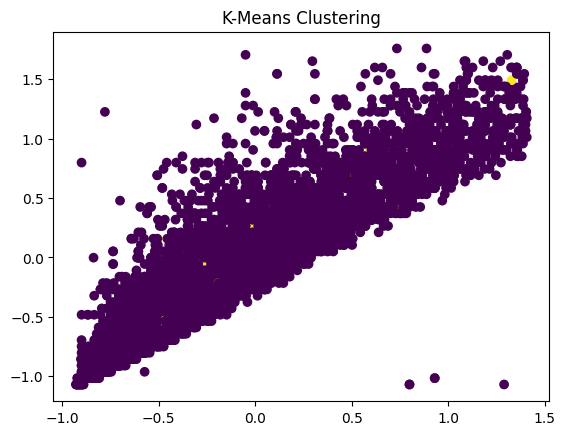

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

# K-Means Clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X)

# Cluster assignments
labels = kmeans.labels_

# Compute Silhouette Score
silhouette = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette}")

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()

Number of clusters found by DBSCAN: 25
Number of noise points: 9048
Silhouette Score: -0.8467916276305563


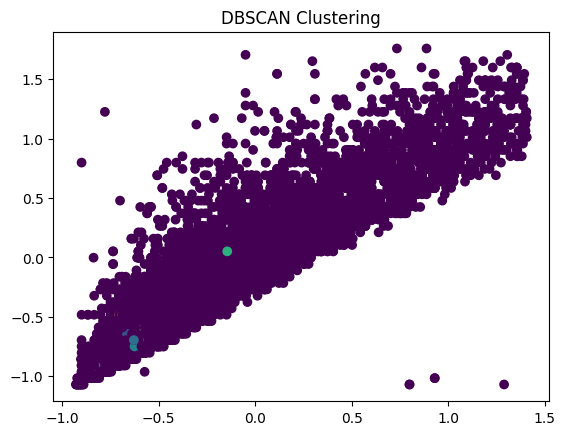

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Count number of clusters (excluding noise points labeled as -1)
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
num_noise_points = np.sum(dbscan_labels == -1)

print(f"Number of clusters found by DBSCAN: {num_clusters}")
print(f"Number of noise points: {num_noise_points}")

# Compute Silhouette Score (only if there are more than 1 clusters)
if num_clusters > 1:
    silhouette = silhouette_score(X, dbscan_labels)
    print(f"Silhouette Score: {silhouette}")
else:
    silhouette = None
    print("Silhouette Score not applicable (only one cluster found).")

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()


In [10]:
# Comparison table
models = ['kNN', 'Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Deep Learning', 'K-Means', 'DBSCAN']
accuracies = [
    accuracy_score(y_test, y_pred_knn),  # kNN
    accuracy_score(y_test, y_pred_lr),   # Logistic Regression
    accuracy_score(y_test, y_pred_rf),   # Random Forest
    accuracy_score(y_test, y_pred_gb),   # Gradient Boosting
    test_acc,                            # Deep Learning
    np.nan,                              # K-Means does not have accuracy
    np.nan                               # DBSCAN does not have accuracy
]

model_comparison = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

print(model_comparison)

                 Model  Accuracy
0                  kNN  0.966268
1  Logistic Regression  0.997824
2        Random Forest  1.000000
3    Gradient Boosting  1.000000
4        Deep Learning  0.973885
5              K-Means       NaN
6               DBSCAN       NaN
